In [9]:
using NBInclude

using Plots
using FileIO

using GenericLinearAlgebra
using SymPy
using PyCall
using PyPlot
using LinearAlgebra
using NBInclude
@nbinclude("julia_OBE_funtions.ipynb") 
#@nbinclude("Practice.ipynb") 
#using julia_OBE_funtions.ipynb as OBE


np = pyimport("numpy")
hamil = pyimport("Practice.ipynb")

Sym[Delta1, Delta2]

LoadError: PyError (PyImport_ImportModule

The Python package Practice.ipynb could not be imported by pyimport. Usually this means
that you did not install Practice.ipynb in the Python version being used by PyCall.

PyCall is currently configured to use the Julia-specific Python distribution
installed by the Conda.jl package.  To install the Practice.ipynb module, you can
use `pyimport_conda("Practice.ipynb", PKG)`, where PKG is the Anaconda
package that contains the module Practice.ipynb, or alternatively you can use the
Conda package directly (via `using Conda` followed by `Conda.add` etcetera).

Alternatively, if you want to use a different Python distribution on your
system, such as a system-wide Python (as opposed to the Julia-specific Python),
you can re-configure PyCall with that Python.   As explained in the PyCall
documentation, set ENV["PYTHON"] to the path/name of the python executable
you want to use, run Pkg.build("PyCall"), and re-launch Julia.

) <class 'ModuleNotFoundError'>
ModuleNotFoundError("No module named 'Practice'")


In [4]:

# Define time array
times = range(0, stop=8 * π, length=500)


# Define initial state vector at t=0
psi_0 = [1.0, 0.0]
Delta_0 = 5.266e-8 #eV

Omegas = [1.398e9, 1.398e9]
Gammas = [6.25e-11, 6.25e-11]
Deltas = [Gammas[1]/2, Gammas[2]/2]

# Define initial density matrix
rho_0 = reshape([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], (9, 1))
rho_t = zeros(Float64, length(times), 4)

#Initial conditions atom 
T = 2.0e-3 #K
k_b = 1.38e-23 #J/K
m = 1.443e-25 #kg
x_position = 0.0
y_position = 0.0
x_velocity = sqrt(k_b*T/m)
y_velocity = 0.0
println("x_velocity ", x_velocity)
#time
dt = 0.1e-9
time = 32.0e-9

#Constants
g = 1.0
mu_B = 8.794e10 #1/sT

k = 1.06e7
B = 1.0

print(Deltas)


x_velocity 0.43734219013055586
[3.125e-11, 3.125e-11]

In [8]:
# Define arrays to store position, velocity, time and force
x_positions = Float64[]
y_positions = Float64[]
x_velocities = Float64[]
time_list = Float64[]
force_list = Float64[]
for t in 1:Int(time / dt)
    push!(x_positions, x_position)
    push!(y_positions, y_position)
    push!(x_velocities, x_velocity)
    push!(time_list, t*dt)
    
    update_detuning(Deltas,Delta_0,g,mu_B,B,k,x_velocity) # Update detunings
    
    M =time_dep_matrix(Omegas, Deltas, Gammas,k,x_position) # Calculate the time dependent matrix
    
    density_array_t = time_evolve(M, t, rho_0) # Perform time evolution of the density matrix
    density_mat_t = reshape(density_array_t, (3, 3)) # Reshape the density matrix into a 3x3 matrix
    F_0 = force_operator(Omegas,k,x_position)
    F_t = real(expected_value(F_0, density_mat_t))# Calculate the expected value of the force operator
    
    global x_position, y_position, x_velocity, y_velocity = update_velocity_position(x_position,y_position,x_velocity,y_velocity,dt,F_t)
    
end

In [9]:

p = Plots.plot(time_list, x_positions, xlabel="time", ylabel="x position", title="atom_in_mot")
Plots.savefig(p, "atom_in_mot.png")


"/Users/sofiapedraza/Desktop/MOT/Organizado/atom_in_mot.png"

x_position [0.0, 4.3734219672163495e-11, 8.746843525246346e-11, 1.3120265358750978e-10, 1.749368712209836e-10, 2.186710895164124e-10, 2.6240530213726206e-10, 3.061395415609391e-10, 3.498737807937278e-10, 3.936080421074436e-10, 4.373422741110462e-10, 4.810765262225101e-10, 5.248107521869315e-10, 5.685449839370182e-10, 6.12279186392957e-10, 6.560133674648735e-10, 6.997475969276838e-10, 7.434818960190043e-10, 7.872160328385446e-10, 8.309502889824558e-10, 8.746845626674103e-10, 9.184188608260399e-10, 9.62153238846283e-10, 1.0058877606329936e-9, 1.049622352400788e-9, 1.0933569507012729e-9, 1.1370915063565e-9, 1.1808261076132872e-9, 1.2245607660608124e-9, 1.2682954424287913e-9, 1.3120301732283004e-9, 1.355764865343977e-9, 1.3994995774533745e-9, 1.443234252946227e-9, 1.486968811106615e-9, 1.530703259350135e-9, 1.5744374408581608e-9, 1.6181716927902213e-9, 1.661905857025743e-9, 1.7056400844217346e-9, 1.7493743640639277e-9, 1.7931085855504372e-9, 1.8368428651565223e-9, 1.8805770112526094e-9, 1.

[ Info: Saved animation to /Users/sofiapedraza/Desktop/MOT/Organizado/atom_in_mot.gif


Plots.AnimatedGif("/Users/sofiapedraza/Desktop/MOT/Organizado/atom_in_mot.gif")
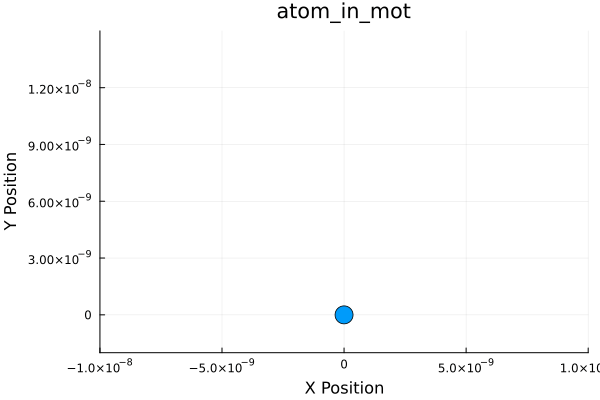

In [10]:
p = Plots.plot(time_list, x_velocities, xlabel="time", ylabel="x velocity",  title="atom_in_mot velocity")
Plots.savefig(p, "atom_in_mot_velocity.png")
# Plot the trajectory of the ball
println("x_position ", x_positions)
anim = @animate for i in 1:length(x_positions)
    Plots.plot([x_positions[i]], [y_positions[i]], seriestype=:scatter, marker=:circle, ms=10,
        xlim=(-10e-9, 10e-9), ylim=(-2e-9, 15e-9), xlabel="X Position", ylabel="Y Position",
        title="atom_in_mot", legend=false)
end

Plots.gif(anim, "atom_in_mot.gif", fps = 20)